# 基于 AlexNet 的 FashionMNIST 数据集的分类
## AlexNet
### 基本架构：
AlexNet 于 LeNet 的结构很相似，但是输入参数的数量与网络深度都比 LeNet 高很多，其基本结构如下：

输入：图片（$3\times 224\times 224$）
- $11\times 11$ 卷积层（96），步幅为 4 （96@54*54）
- ReLU 函数激活
- $3\times 3$ 最大汇聚层，步幅为 2 （96@26*26）
- $5\times 5$ 卷积层（256），填充为 2 （256@26*26）
- ReLU 函数激活
- $3\times 3$ 最大汇聚层，步幅为 2 （256@12*12）
- $3\times 3$ 卷积层（384），填充为 1 （384@12*12）
- ReLU 函数激活
- $3\times 3$ 卷积层（384），填充为 1 （384@12*12）
- ReLU 函数激活
- $3\times 3$ 卷积层（256），填充为 1 （256@12*12）
- ReLU 函数激活
- $3\times 3$ 最大汇聚层，步幅为 2 （256@5*5）
- Flatten 展平
- 全连接层（256\*5*5,4096）
- ReLU 函数激活
- Dropout(0.5)
- 全连接层（4096，4096）
- ReLU 函数激活
- Dropout(0.5)
- 全连接层（4096，1000）
- softmax 函数分类输出

输出：1000 个类别样本

### 创新特点
1. 激活函数使用 ReLU 函数，有效避免了饱和，使得训练更容易。
2. 使用了暂退法（dropout），控制全连接层的复杂度。
3. 在训练时增加了大量的图像增强数据，如翻转、裁切和变色。 使得模型更健壮，更大的样本量有效地减少了过拟合。
4. 模型层数加深。

In [10]:
# imports
import basic
from torch import nn
from torch import optim


class AlexNet(basic.Net):
    def __init__(self):
        super(basic.Net).__init__()
        self.alexnet()
    
    def alexnet(self):
        self.net=nn.Sequential(
            nn.Conv2d(1,96,kernel_size=11,stride=4),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2),
            nn.Conv2d(96,256,kernel_size=5, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3,stride=2),
            nn.Conv2d(256,384,kernel_size=3,padding=1),
            nn.ReLU(),
            nn.Conv2d(384,384,kernel_size=3,padding=1),
            nn.ReLU(),
            nn.Conv2d(384,256,kernel_size=3,padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3,stride=2),
            nn.Flatten(),
            nn.Linear(256*5*5,4096),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(4096,4096),
            nn.ReLU(),
            nn.Dropout(p=0.5),
            nn.Linear(4096,10))

['pullover', 'pullover', 'pullover', 'ankle boot']


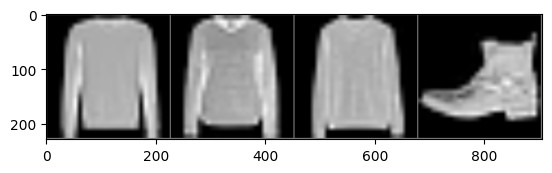

In [13]:
ROOT = "./data"
BatchSize = 256
optimizer = optim.SGD
criterion = nn.CrossEntropyLoss()

trains, tests, labels = basic.load_FashionMNIST_datasets(BatchSize,224,ROOT)
basic.show_some_samples(trains,labels)

In [14]:
alexnet = AlexNet()
alexnet.train(trains,criterion,optimizer,epochs=1)
alexnet.accuracy(tests)
alexnet.label_accuracy(tests,labels)

Training on!


  0%|          | 0/5 [00:00<?, ?it/s]